<a href="https://colab.research.google.com/github/AnirudhPhophalia/imdb_text_rnn_dataset/blob/main/imdb_text_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import numpy as np

In [2]:
# loading the imdb text dataset
vocab_size = 10000  # sirf top 10k words use karenge
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Words ko decode karne ke liye index is dictionary
word_index = imdb.get_word_index()
index_word = {index + 3: word for word, index in word_index.items()}
index_word[0] = "<PAD>"
index_word[1] = "<START>"
index_word[2] = "<UNK>"
index_word[3] = "<UNUSED>"

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# paading jisse sab sequence ki lenght sam ho jaaye
max_length = 200
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

In [11]:
# model building
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 32, input_length=max_length),  # embedding layer for word vector
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),  # second LSTM
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # output layer: 1 unit sigmoid
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
# compilation and summary
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, max_length))


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 200, 128)       │        49,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 410,945 (1.57 MB)

 Trainable params: 410,945 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 147s 447ms/step - accuracy: 0.6384 - loss: 0.6048 - val_accuracy: 0.8528 - val_loss: 0.3619
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 453ms/step - accuracy: 0.8776 - loss: 0.3147 - val_accuracy: 0.8390 - val_loss: 0.3925
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 451ms/step - accuracy: 0.9163 - loss: 0.2345 - val_accuracy: 0.8184 - val_loss: 0.3985
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 451ms/step - accuracy: 0.9357 - loss: 0.1859 - val_accuracy: 0.8588 - val_loss: 0.4060
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 452ms/step - accuracy: 0.9573 - loss: 0.1248 - val_accuracy: 0.8414 - val_loss: 0.4346


In [14]:
loss, acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {acc:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 77ms/step - accuracy: 0.8244 - loss: 0.4811

Test Accuracy: 0.82


A test accuracy of 82percent is still less and we can still se that validationa ccuracy is less tahn teh output accuracy that is we can now that our lstm is still overfitting after providing an extra lyer and also a dropout

Lets confirm the graph between validation and training accuracy

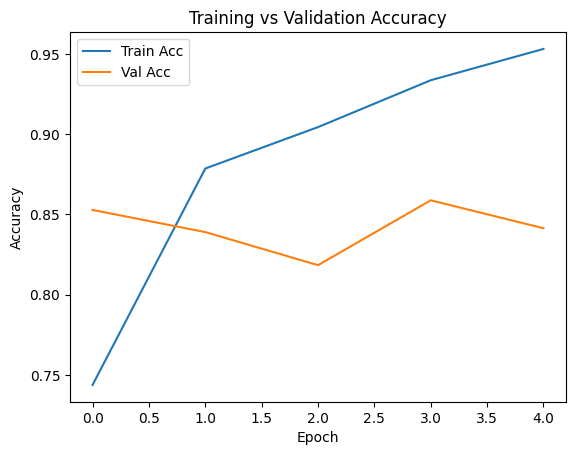

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data (probabilities → 0/1)
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Classification Report
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", cm)


782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 89ms/step
              precision    recall  f1-score   support

           0       0.85      0.79      0.82     12500
           1       0.80      0.86      0.83     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000

Confusion Matrix:
 [[ 9878  2622]
 [ 1811 10689]]


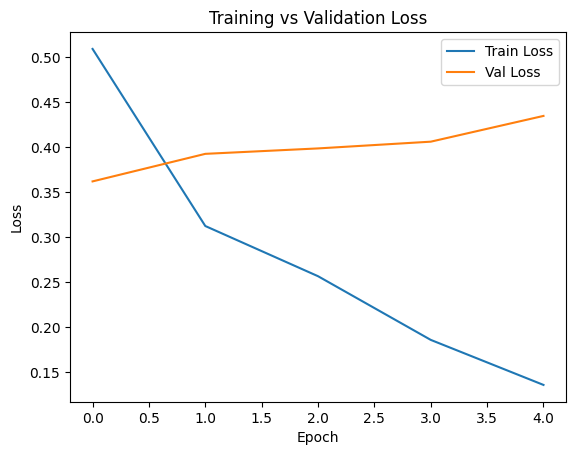

In [18]:
# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


Oh we cans see now that we need to improve our model mmore like add more layers and do more dropout for better accuracy